# Pytorch Fundamentals

In [1]:
import numpy as np
import torch as pt

%matplotlib inline
from matplotlib import pyplot as plt

import time
print(pt.__version__)

1.10.0+cu111


## Tensor Basics

A tensor is any n-dimensional array (including a scalar, vector or matrix).

In [2]:
# Scalar
t1 = pt.tensor(4.)

# Vector
t2 = pt.tensor([1., 2., 3., 4.])

# Matrix
t3 = pt.tensor([[5.,6], [7,8], [9,10]])

# 3D array
t4 = pt.tensor([
    [[11, 12, 13],
    [13, 14, 15]],
    [[15, 16, 17],
    [17,18,19]]
])


print(t1.shape,'\n',t1,'\n')
print(t2.shape,'\n',t2,'\n')
print(t3.shape,'\n',t3,'\n')
print(t4.shape,'\n',t4)

torch.Size([]) 
 tensor(4.) 

torch.Size([4]) 
 tensor([1., 2., 3., 4.]) 

torch.Size([3, 2]) 
 tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]]) 

torch.Size([2, 2, 3]) 
 tensor([[[11, 12, 13],
         [13, 14, 15]],

        [[15, 16, 17],
         [17, 18, 19]]])


In [3]:
# Initialize zeros matrix
t1 = pt.zeros(3, 4)

# Initialize ones matrix
t2 = pt.ones(2,3,4)

# Initialize matrix with random values
t3 = pt.rand(2, 2, 2, 3)

print(t1.shape,'\n',t1,'\n')
print(t2.shape,'\n',t2,'\n')
print(t3.shape,'\n',t3)

torch.Size([3, 4]) 
 tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]) 

torch.Size([2, 3, 4]) 
 tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]]) 

torch.Size([2, 2, 2, 3]) 
 tensor([[[[0.3489, 0.3703, 0.4012],
          [0.9726, 0.9836, 0.1621]],

         [[0.3962, 0.7530, 0.3431],
          [0.0732, 0.8721, 0.9327]]],


        [[[0.1571, 0.4087, 0.6662],
          [0.2543, 0.0422, 0.2589]],

         [[0.4714, 0.3234, 0.1258],
          [0.0387, 0.4466, 0.1338]]]])


## Interoperability with Numpy

In [4]:
# Simple Python List
python_list = [1, 2]

# Create a numpy array from python list
numpy_array = np.array(python_list)

# Create a torch Tensor from python list
tensor_from_list = pt.tensor(python_list)

# Create a torch Tensor from Numpy array
tensor_from_array = pt.tensor(numpy_array)

# Another way to create a torch Tensor from Numpy array (share same storage)
tensor_from_array_v2 = pt.from_numpy(numpy_array)

# Convert torch tensor to numpy array
array_from_tensor = tensor_from_array.numpy()

print('List:   ', python_list)
print('Array:  ', numpy_array)
print('Tensor: ', tensor_from_list)
print('Tensor: ', tensor_from_array)
print('Tensor: ', tensor_from_array_v2)
print('Array:  ', array_from_tensor)

List:    [1, 2]
Array:   [1 2]
Tensor:  tensor([1, 2])
Tensor:  tensor([1, 2])
Tensor:  tensor([1, 2])
Array:   [1 2]


We have two different ways to create tensor from its NumPy counterpart: 
- `torch.Tensor`: one copies memory and 
- `torch.from_numpy`: one shares the same underlying storage.

In [5]:
numpy_array[0] = 10

print('Changed Array:  ', numpy_array)
print('Tensor copy memory: ', tensor_from_array)
print('Tensor sharing memory: ', tensor_from_array_v2)

Changed Array:   [10  2]
Tensor copy memory:  tensor([1, 2])
Tensor sharing memory:  tensor([10,  2])


### Data Types

The basic data type of all Deep Learning-related operations is float, but sometimes you may need something else. Pytorch support different number types for its tensors the same way NumPy does it - by specifying the data type on tensor creation or via casting.

In [6]:
tensor = pt.zeros(2, 2)
print('Tensor with default type: \n', tensor)

tensor1 = pt.zeros(2, 2, dtype=pt.float16)
print('Tensor with 16-bit float: \n', tensor1)

tensor2 = pt.zeros(2, 2, dtype=pt.int16)
print('Tensor with integers: \n', tensor2)

tensor3 = tensor.type(pt.bool)
print('Tensor with boolean data: \n', tensor3)

Tensor with default type: 
 tensor([[0., 0.],
        [0., 0.]])
Tensor with 16-bit float: 
 tensor([[0., 0.],
        [0., 0.]], dtype=torch.float16)
Tensor with integers: 
 tensor([[0, 0],
        [0, 0]], dtype=torch.int16)
Tensor with boolean data: 
 tensor([[False, False],
        [False, False]])


### Indexing

In [7]:
a = pt.rand((5, 3))
rows = pt.arange(0, 2)
print(a)
print(rows)
print(a[rows])

tensor([[0.1411, 0.1401, 0.1087],
        [0.2660, 0.1236, 0.6172],
        [0.4185, 0.1392, 0.4104],
        [0.5480, 0.8486, 0.9430],
        [0.6654, 0.0826, 0.0039]])
tensor([0, 1])
tensor([[0.1411, 0.1401, 0.1087],
        [0.2660, 0.1236, 0.6172]])


In [8]:
a = pt.zeros(3, 2)
b = pt.ones(3, 2)
print(pt.cat((a, b), dim=0))

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])


## Tensor Operations

### Autograd
Pytorch supports automatic differentiation. The module which implements this is called AutoGrad. It calculates the gradients and keeps track in forward and backward passes. For primitive tensors, you need to enable or disable it using the required_grad flag. But, for advanced tensors, it is enabled by default

In [9]:
x = pt.tensor(3.)
w = pt.tensor(4., requires_grad=True)
b = pt.tensor(5., requires_grad=True)
y = w * x + b
print(y)

tensor(17., grad_fn=<AddBackward0>)


As expected, y is a tensor with the value 3 * 4 + 5 = 17. 

What makes PyTorch special is that we can automatically compute the derivative of y w.r.t. the tensors that have requires_grad set to True i.e. w and b. To compute the derivatives, we can call the .backward method on our result y.

In [10]:
# Compute derivatives
y.backward()

#Display the gradients
print('dy/dx:', x.grad)
print('dy/dw:', w.grad)
print('dy/db:', b.grad)

dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


**Disabling Autograd**

We don't need to compute gradients for all the variables that are involved in the pipeline. The Pytorch API provides two ways to disable autograd.

- `detach` returns a copy of the tensor with autograd disabled. This copy is built on the same memory as the original tensor.
- `torch.no_grad()`: It is a context manager that allows you to guard a series of operations from autograd without creating new tensors.

In [11]:
a = pt.rand((3, 5), requires_grad=True)
with pt.no_grad():
    result = a * 5
mean_result = result.sum()

# it would give error as we had disabled autograd
try:
    mean_result.backward()
except RuntimeError:
    print("Auto grad is disabled!!")
print("gradient of a:", a.grad)

Auto grad is disabled!!
gradient of a: None


### Reshaping a tensor 
Its a frequently used operation. We can change the shape of a tensor without the memory copying overhead. There are two methods for that: `reshape` and `view`.

The difference is the following:

- `view` shares the same memory with the original tensor
- `reshape` tries to reuse the memory, if not then creates a copy

Let's see with the help of an example:

In [12]:
orig = pt.rand(2, 3, 4)
print('Pointer to data: ', orig.data_ptr())
print('Shape: ', orig.shape)
print('Original data:\n', orig)

view = orig.view(3, 2, 4)
print('Viewed tensor - pointer to data', view.data_ptr())
print('Viewed tensor shape ', view.shape)
print('Viewed data:\n', view)

reshaped = orig.reshape(24)
print('Reshaped tensor - pointer to data', reshaped.data_ptr())
print('Reshaped tensor shape ', reshaped.shape)
print('Reshaped data:\n', reshaped)

assert np.all(np.equal(view.numpy().flat, reshaped.numpy().flat))

Pointer to data:  94547708508544
Shape:  torch.Size([2, 3, 4])
Original data:
 tensor([[[0.1461, 0.5134, 0.2296, 0.8983],
         [0.5029, 0.7537, 0.3057, 0.9972],
         [0.3054, 0.2991, 0.7453, 0.2028]],

        [[0.6805, 0.9405, 0.1137, 0.1345],
         [0.8513, 0.1525, 0.6227, 0.4754],
         [0.3267, 0.3876, 0.9068, 0.6108]]])
Viewed tensor - pointer to data 94547708508544
Viewed tensor shape  torch.Size([3, 2, 4])
Viewed data:
 tensor([[[0.1461, 0.5134, 0.2296, 0.8983],
         [0.5029, 0.7537, 0.3057, 0.9972]],

        [[0.3054, 0.2991, 0.7453, 0.2028],
         [0.6805, 0.9405, 0.1137, 0.1345]],

        [[0.8513, 0.1525, 0.6227, 0.4754],
         [0.3267, 0.3876, 0.9068, 0.6108]]])
Reshaped tensor - pointer to data 94547708508544
Reshaped tensor shape  torch.Size([24])
Reshaped data:
 tensor([0.1461, 0.5134, 0.2296, 0.8983, 0.5029, 0.7537, 0.3057, 0.9972, 0.3054,
        0.2991, 0.7453, 0.2028, 0.6805, 0.9405, 0.1137, 0.1345, 0.8513, 0.1525,
        0.6227, 0.4754, 0.

### Image View

mask shape before: torch.Size([256, 256])
mask shape after: torch.Size([3, 256, 256])


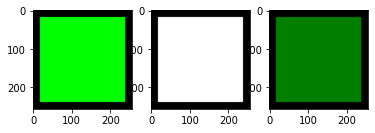

In [13]:
# Create a black image
image = pt.zeros(size=(3, 256, 256), dtype=pt.int)

# Leave the borders and make the rest of the image Green
image[1, 18:256 - 18, 18:256 - 18] = 255

# Create a mask of the same size
mask = pt.zeros(size=(256, 256), dtype=pt.bool)
print(f"mask shape before: {mask.shape}")

# Assuming the green region in the original image is the Region of interest, 
# change the mask to white for that area
mask[18:256 - 18, 18:256 - 18] = 1

# Create a view of the mask with the same dimensions as the original image
mask_expanded = mask.expand_as(image)
print(f"mask shape after: {mask_expanded.shape}")

mask_np = mask_expanded.numpy().transpose(1, 2, 0) * 255
image_np = image.numpy().transpose(1, 2, 0)

fig, ax = plt.subplots(1, 3)
ax[0].imshow(image_np)
ax[1].imshow(mask_np)

image[mask_expanded] -= 128
image.clamp_(0, 255)
ax[2].imshow(image_np)
plt.show()

## Custom Regression Model Training on GPU

### FeedForward Model

In [14]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                  [91, 88, 64],
                  [87, 134, 58],
                  [102, 43, 37],
                  [69, 96, 70]], dtype= 'float32')

# Targets (apples, oranges)
targets = np.array([[56, 70],
                   [81, 101],
                   [119, 133],
                   [22, 37],
                   [103, 119]], dtype= 'float32')

# device
gpu = pt.device("cuda")

# Convert inputa and targets to tensors
inputs = pt.from_numpy(inputs).to("cuda")
targets = pt.from_numpy(targets).to("cuda")
print(f"Input shape: {inputs.shape}")
print(f"Targets shape: {targets.shape}")

Input shape: torch.Size([5, 3])
Targets shape: torch.Size([5, 2])


`torch.randn` creates a tensor of the given shape, with elements picked randomly from a normal distribution with mean 0 and standard deviation 1.

In [15]:
# Weights and biases
w = pt.randn(targets.shape[1], inputs.shape[1], device=gpu, requires_grad= True)
b = pt.randn(targets.shape[1], device=gpu, requires_grad= True)
print(f"Weights: \n {w}")
print(f"Biases: {b}")

Weights: 
 tensor([[ 0.9668, -0.7833, -0.8931],
        [ 0.4536,  0.4343, -0.5132]], device='cuda:0', requires_grad=True)
Biases: tensor([-2.3648, -1.0439], device='cuda:0', requires_grad=True)


In [16]:
# Define the model
# Linear Regression
def model(x):
  return x @ w.t() + b 

# Predictions
preds = model(inputs)

# Let's define a metric to understand how worse out predictions are
# Mean Squared Error loss function
def mse(t1, t2):
  diff = t1-t2
  return pt.sum(diff*diff) / diff.numel()
#.numel method returns the number of elements in a tensor.

# Compute loss
loss = mse(preds, targets)
print(f"Loss: {loss}")

Loss: 10508.916015625


There’s a huge difference between the predictions of our model, and the actual values of the target variables. Let's try to reduce the loss by adjusting weights and biases.

### Backpropagation (for one epoch)


In [17]:
# Compute Gradients
loss.backward()
print(w.grad)
print(b.grad)

tensor([[ -9015.3418, -11712.8945,  -6895.2485],
        [ -3593.9470,  -4686.7974,  -2845.1836]], device='cuda:0')
tensor([-112.5968,  -45.5010], device='cuda:0')


In [18]:
# Adjust weights and biases
learning_rate = 1e-04
with pt.no_grad():
    w -= w.grad * learning_rate
    b -= b.grad * learning_rate
    w.grad.zero_()
    b.grad.zero_()

# After we have updated the weights, we reset the gradients to zero by calling .zero_() method. 
# We need to do this, because PyTorch accumulates gradients.

print(f"Weights: \n {w}")
print(f"Biases: {b}")

Weights: 
 tensor([[ 1.8683,  0.3880, -0.2035],
        [ 0.8130,  0.9030, -0.2287]], device='cuda:0', requires_grad=True)
Biases: tensor([-2.3536, -1.0393], device='cuda:0', requires_grad=True)


In [19]:
# Predictions
preds = model(inputs)

# Compute loss
loss = mse(preds, targets)
print(f"Loss: {loss}")

Loss: 7079.55712890625


Loss reduced drastically, isn't it? This was for one epoch (a complete feedforward - backpropagation cycle). Let's  repeat the same for multiple epoch untill we reach a satisfied value for loss.

### Model Training for multiple epochs

In [20]:
start = time.time()
for i in range(100):
  preds = model(inputs)
  loss = mse(preds, targets)
  print(f"Loss for Epoch {i} : {loss}")
  loss.backward()
  with pt.no_grad():
    w -= w.grad * learning_rate
    b -= b.grad * learning_rate
    w.grad.zero_()
    b.grad.zero_()

print(f"Total time taken: {time.time()- start}")

Loss for Epoch 0 : 7079.55712890625
Loss for Epoch 1 : 4877.60791015625
Loss for Epoch 2 : 3450.356201171875
Loss for Epoch 3 : 2513.754638671875
Loss for Epoch 4 : 1889.3671875
Loss for Epoch 5 : 1464.9224853515625
Loss for Epoch 6 : 1169.6171875
Loss for Epoch 7 : 958.6625366210938
Loss for Epoch 8 : 803.6026611328125
Loss for Epoch 9 : 686.2548217773438
Loss for Epoch 10 : 594.9085693359375
Loss for Epoch 11 : 521.9439697265625
Loss for Epoch 12 : 462.3360900878906
Loss for Epoch 13 : 412.71539306640625
Loss for Epoch 14 : 370.77490234375
Loss for Epoch 15 : 334.8973693847656
Loss for Epoch 16 : 303.91839599609375
Loss for Epoch 17 : 276.9750061035156
Loss for Epoch 18 : 253.40966796875
Loss for Epoch 19 : 232.7078857421875
Loss for Epoch 20 : 214.4571533203125
Loss for Epoch 21 : 198.3195343017578
Loss for Epoch 22 : 184.0139923095703
Loss for Epoch 23 : 171.30357360839844
Loss for Epoch 24 : 159.98594665527344
Loss for Epoch 25 : 149.88743591308594
Loss for Epoch 26 : 140.85797119

In [21]:
print(f"Target values :\n {targets}")
print(f"Prediction values :\n {preds}")

Target values :
 tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]], device='cuda:0')
Prediction values :
 tensor([[ 57.1626,  70.5689],
        [ 79.3783,  97.2266],
        [125.1230, 140.3692],
        [ 23.0836,  39.1749],
        [ 95.3643, 111.6812]], device='cuda:0', grad_fn=<AddBackward0>)


**Wow! So Close. Our model has been trained well.**